# Data Science Project: TBD

**Author**: Samer Eladad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import seaborn as sns
import tkinter as tk
from tkinter import ttk
from tkinter import Label, messagebox
from PIL import Image, ImageTk
from joblib import load
from tkinter import PhotoImage

In [2]:
# Clean combined movies dataset
movies_clean_path = '/Users/samer/Documents/github_repos/Cinemalytics/data/clean/updated_clean_combined_movies.csv'
movies_clean_df = pd.read_csv(movies_clean_path)

# Clean combined series dataset
series_clean_path = '/Users/samer/Documents/github_repos/Cinemalytics/data/clean/clean_combined_series.csv'
series_clean_df = pd.read_csv(series_clean_path)

# Separate movie DataFrames by platform and content type
netflix_movies_df = movies_clean_df[movies_clean_df['platform'] == 'Netflix']
prime_video_movies_df = movies_clean_df[movies_clean_df['platform'] == 'Prime Video']
disney_plus_movies_df = movies_clean_df[movies_clean_df['platform'] == 'Disney+']

# Separate series DataFrames by platform and content type
netflix_series_df = series_clean_df[series_clean_df['platform'] == 'Netflix']
prime_video_series_df = series_clean_df[series_clean_df['platform'] == 'Prime Video']
disney_plus_series_df = series_clean_df[series_clean_df['platform'] == 'Disney+']

In [81]:
# Display Clean Movies dataset column names
print("\nClean Combined Movies dataset column names:")
print(movies_clean_df.columns.tolist())


Clean Combined Movies dataset column names:
['title', 'age_rating', 'duration_min', 'genre', 'budget', 'revenue', 'platform']


In [82]:
'''
# Display Clean Series dataset column names
print("\nClean Combined Series dataset column names:")
print(series_clean_df.columns.tolist())
'''

'\n# Display Clean Series dataset column names\nprint("\nClean Combined Series dataset column names:")\nprint(series_clean_df.columns.tolist())\n'

In [83]:
# Explode the movie 'genre' column for each platform
netflix_movies_df = netflix_movies_df.assign(genre=netflix_movies_df['genre'].str.split(', ')).explode('genre')
prime_video_movies_df = prime_video_movies_df.assign(genre=prime_video_movies_df['genre'].str.split(', ')).explode('genre')
disney_plus_movies_df = disney_plus_movies_df.assign(genre=disney_plus_movies_df['genre'].str.split(', ')).explode('genre')

# Count the number of movies by genre
netflix_movies_genre_counts = netflix_movies_df['genre'].value_counts()
prime_video_movies_genre_counts = prime_video_movies_df['genre'].value_counts()
disney_plus_movies_genre_counts = disney_plus_movies_df['genre'].value_counts()

'''
# Explode the series 'genre' column for each platform
netflix_series_df = netflix_series_df.assign(genre=netflix_series_df['genre'].str.split(', ')).explode('genre')
prime_video_series_df = prime_video_series_df.assign(genre=prime_video_series_df['genre'].str.split(', ')).explode('genre')
disney_plus_series_df = disney_plus_series_df.assign(genre=disney_plus_series_df['genre'].str.split(', ')).explode('genre')

# Count the number of series by genre
netflix_series_genre_counts = netflix_series_df['genre'].value_counts()
prime_video_series_genre_counts = prime_video_series_df['genre'].value_counts()
disney_plus_series_genre_counts = disney_plus_series_df['genre'].value_counts()
'''

"\n# Explode the series 'genre' column for each platform\nnetflix_series_df = netflix_series_df.assign(genre=netflix_series_df['genre'].str.split(', ')).explode('genre')\nprime_video_series_df = prime_video_series_df.assign(genre=prime_video_series_df['genre'].str.split(', ')).explode('genre')\ndisney_plus_series_df = disney_plus_series_df.assign(genre=disney_plus_series_df['genre'].str.split(', ')).explode('genre')\n\n# Count the number of series by genre\nnetflix_series_genre_counts = netflix_series_df['genre'].value_counts()\nprime_video_series_genre_counts = prime_video_series_df['genre'].value_counts()\ndisney_plus_series_genre_counts = disney_plus_series_df['genre'].value_counts()\n"

## Average movie duration per Genre for each platform

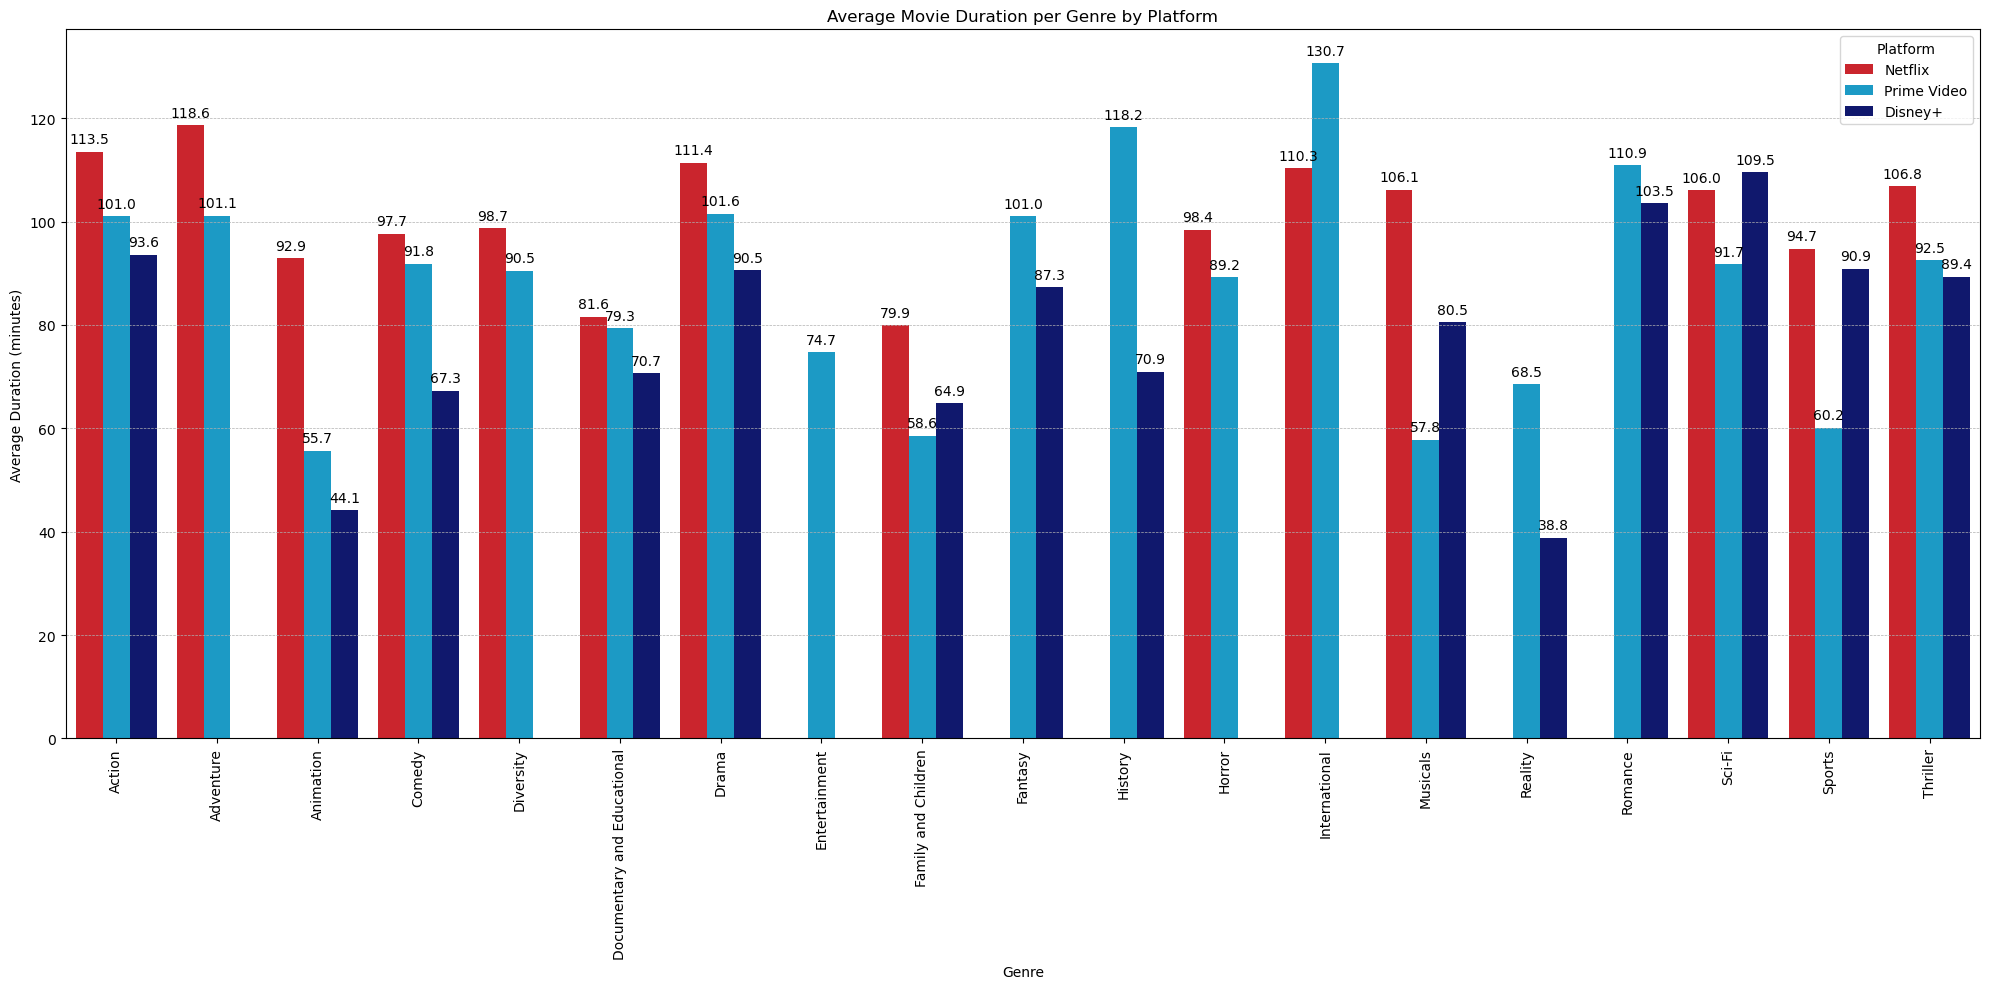

In [84]:
# Calculate average movie duration per genre for each platform
def calculate_avg_duration_per_genre(df):
    return df.groupby('genre')['duration_min'].mean()

netflix_avg_duration = calculate_avg_duration_per_genre(netflix_movies_df)
prime_video_avg_duration = calculate_avg_duration_per_genre(prime_video_movies_df)
disney_plus_avg_duration = calculate_avg_duration_per_genre(disney_plus_movies_df)

# Combine the averages into a single DataFrame
avg_durations = pd.DataFrame({
    'Netflix': netflix_avg_duration,
    'Prime Video': prime_video_avg_duration,
    'Disney+': disney_plus_avg_duration
}).reset_index()

# Melt the DataFrame for easier plotting with seaborn
avg_durations_melted = avg_durations.melt(id_vars='genre', var_name='Platform', value_name='Average Duration')

# Define the colors for each platform
platform_colors = {
    'Netflix': '#E50914',
    'Prime Video': '#00A8E1',
    'Disney+': '#000c7c'
}

# Plotting with the specified colors
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='genre', y='Average Duration', hue='Platform', data=avg_durations_melted, palette=platform_colors)
plt.xticks(rotation=90)
plt.title('Average Movie Duration per Genre by Platform')
plt.xlabel('Genre')
plt.ylabel('Average Duration (minutes)')
plt.legend(title='Platform')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='y')

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

## Average revenue per movie duration

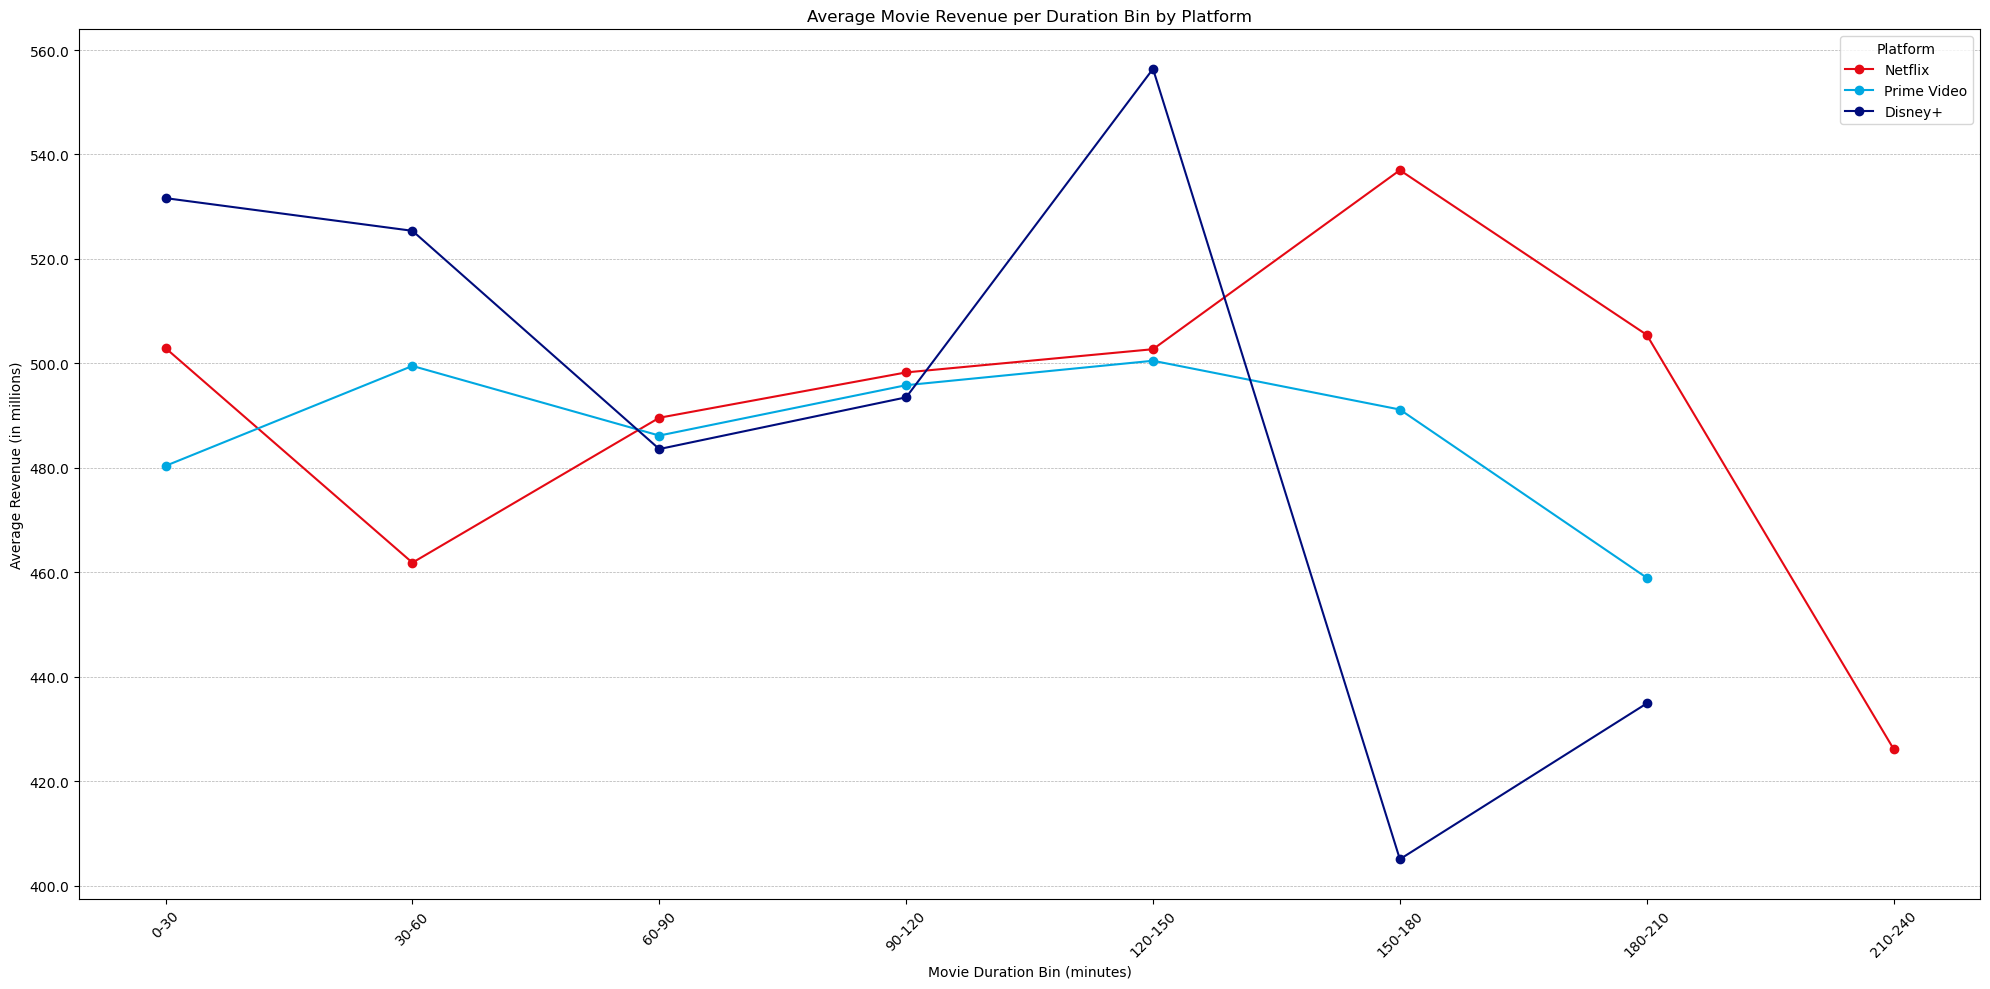

In [85]:
# Function to add duration bins and calculate average revenue
def process_df_for_plotting(df):
    df['duration_bin'] = pd.cut(df['duration_min'], bins=bins, labels=labels, right=False)
    # Note the addition of `observed=True` here to prevent the FutureWarning
    return df.groupby('duration_bin', observed=True)['revenue'].mean().reset_index()

# Define bins for movie durations
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240]
labels = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240']

# Process each platform's DataFrame
netflix_data = process_df_for_plotting(netflix_movies_df)
prime_video_data = process_df_for_plotting(prime_video_movies_df)
disney_plus_data = process_df_for_plotting(disney_plus_movies_df)

# Define the colors for each platform
platform_colors = ['#E50914', '#00A8E1', '#000c7c']

# Plotting
plt.figure(figsize=(20, 10))
ax = plt.gca()  # Get current axis

# Plot for each platform
for i, platform_data in enumerate([netflix_data, prime_video_data, disney_plus_data]):
    plt.plot(platform_data['duration_bin'], platform_data['revenue'], label=['Netflix', 'Prime Video', 'Disney+'][i], color=platform_colors[i], marker='o')

plt.title('Average Movie Revenue per Duration Bin by Platform')
plt.xlabel('Movie Duration Bin (minutes)')

# Format the y-axis tick labels to show them in millions
scale_factor = 1e6  # for millions
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:.1f}'.format(x / scale_factor) for x in ticks_loc])

# Set the y-axis label to indicate the units are in millions
plt.ylabel('Average Revenue (in millions)')

plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()

# Show the plot
plt.show()

## Total Revenue per Genre for each platform (Line Chart for model evaluation)

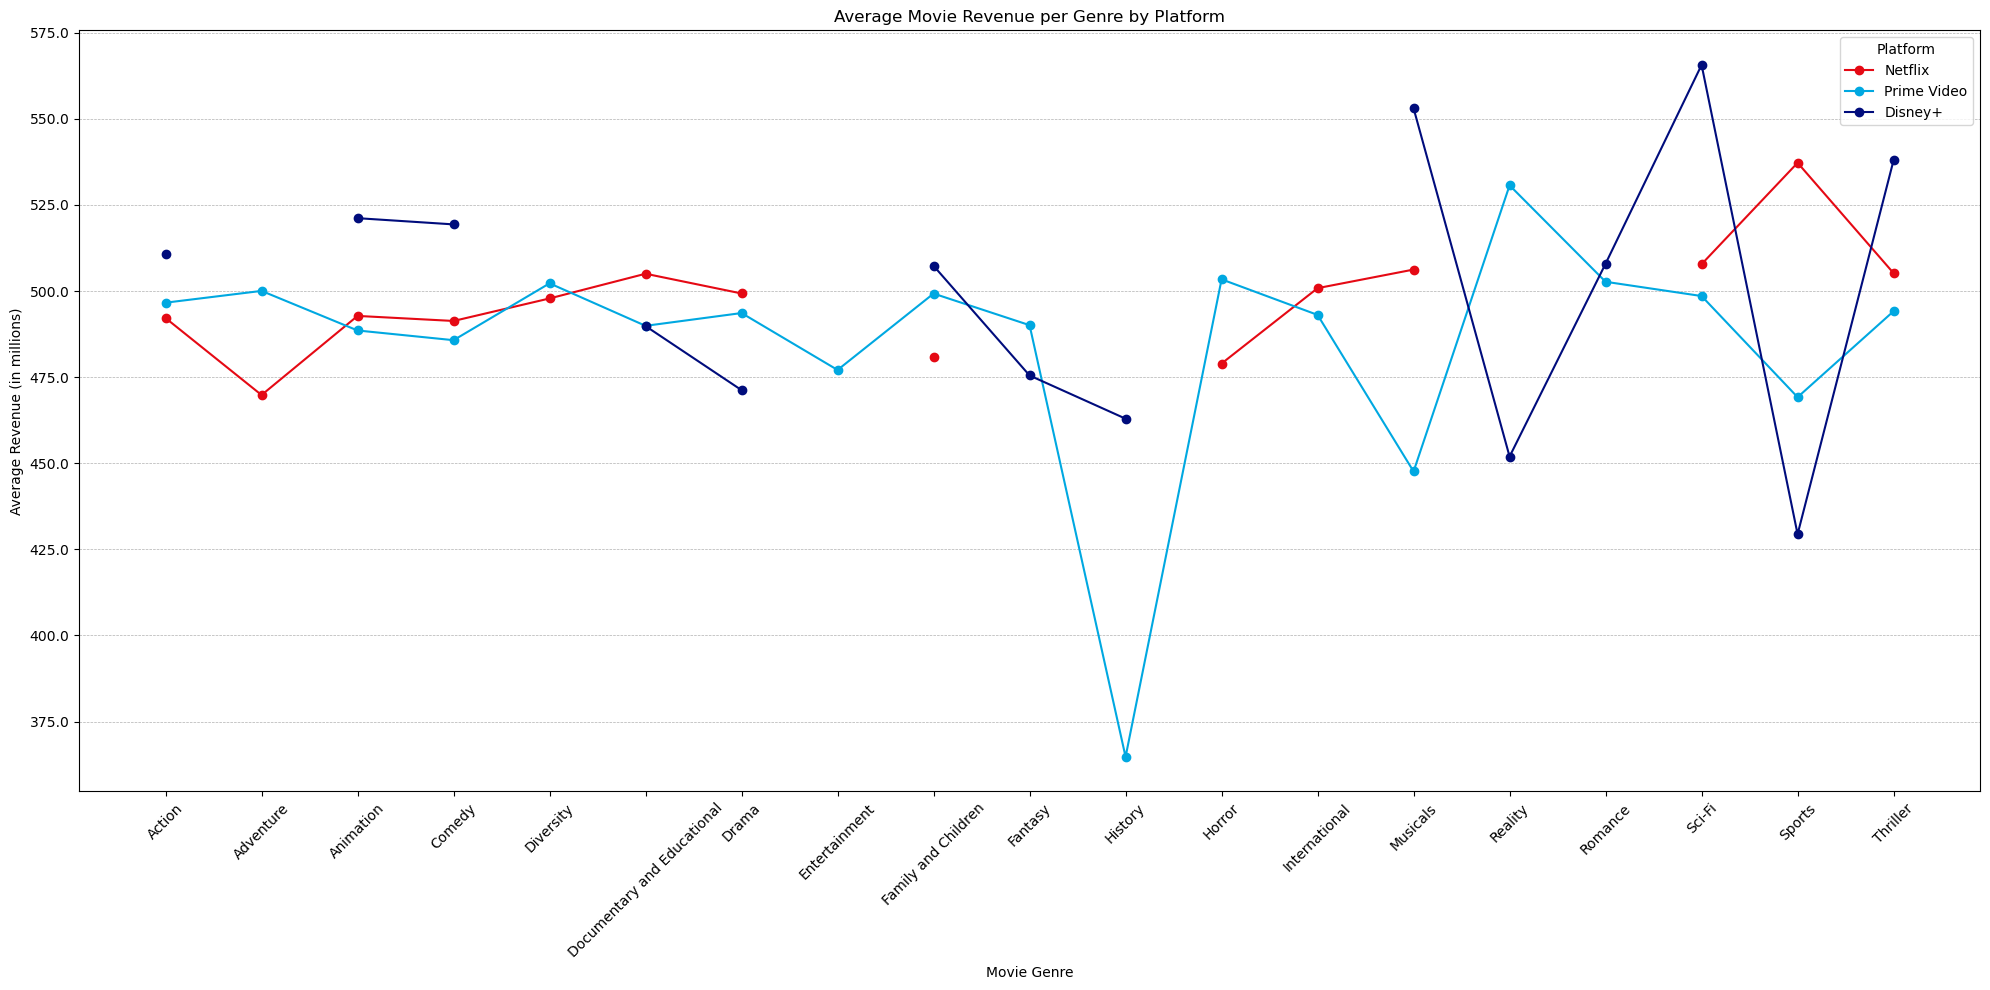

In [86]:
# Function to calculate average revenue per genre and sort genres alphabetically
def process_df_for_genre_revenue(df):
    genre_revenue = df.groupby('genre')['revenue'].mean().reset_index()
    genre_revenue_sorted = genre_revenue.sort_values(by='genre').reset_index(drop=True)
    return genre_revenue_sorted

# Process each platform's DataFrame
netflix_genre_revenue = process_df_for_genre_revenue(netflix_movies_df)
prime_video_genre_revenue = process_df_for_genre_revenue(prime_video_movies_df)
disney_plus_genre_revenue = process_df_for_genre_revenue(disney_plus_movies_df)

# Plotting
plt.figure(figsize=(20, 10))
ax = plt.gca()  # Get current axis

# Ensure all platforms have the same genres in the same order for correct line plotting
all_genres_sorted = sorted(set(netflix_genre_revenue['genre']).union(prime_video_genre_revenue['genre']).union(disney_plus_genre_revenue['genre']))

# Initialize a dictionary to store average revenue for each platform and genre
platform_genre_revenues = {
    'Netflix': [],
    'Prime Video': [],
    'Disney+': []
}

# Calculate average revenue for each genre for each platform
for genre in all_genres_sorted:
    for platform in ['Netflix', 'Prime Video', 'Disney+']:
        if platform == 'Netflix':
            revenue = netflix_genre_revenue[netflix_genre_revenue['genre'] == genre]['revenue'].mean()
        elif platform == 'Prime Video':
            revenue = prime_video_genre_revenue[prime_video_genre_revenue['genre'] == genre]['revenue'].mean()
        else:
            revenue = disney_plus_genre_revenue[disney_plus_genre_revenue['genre'] == genre]['revenue'].mean()
        platform_genre_revenues[platform].append(revenue / 1e6)  # convert to millions

# Plot for each platform
for i, platform in enumerate(['Netflix', 'Prime Video', 'Disney+']):
    plt.plot(all_genres_sorted, platform_genre_revenues[platform], label=platform, color=platform_colors[i], marker='o')

plt.title('Average Movie Revenue per Genre by Platform')
plt.xlabel('Movie Genre')

# Update y-axis to display average revenue
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:.1f}'.format(x) for x in ticks_loc])  # Revenue already in millions from the calculation

# Set the y-axis label to indicate the units are in millions
plt.ylabel('Average Revenue (in millions)')

plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()

# Show the plot
plt.show()


## Average Revenue per Age Rating (Line chart for model evaluation)

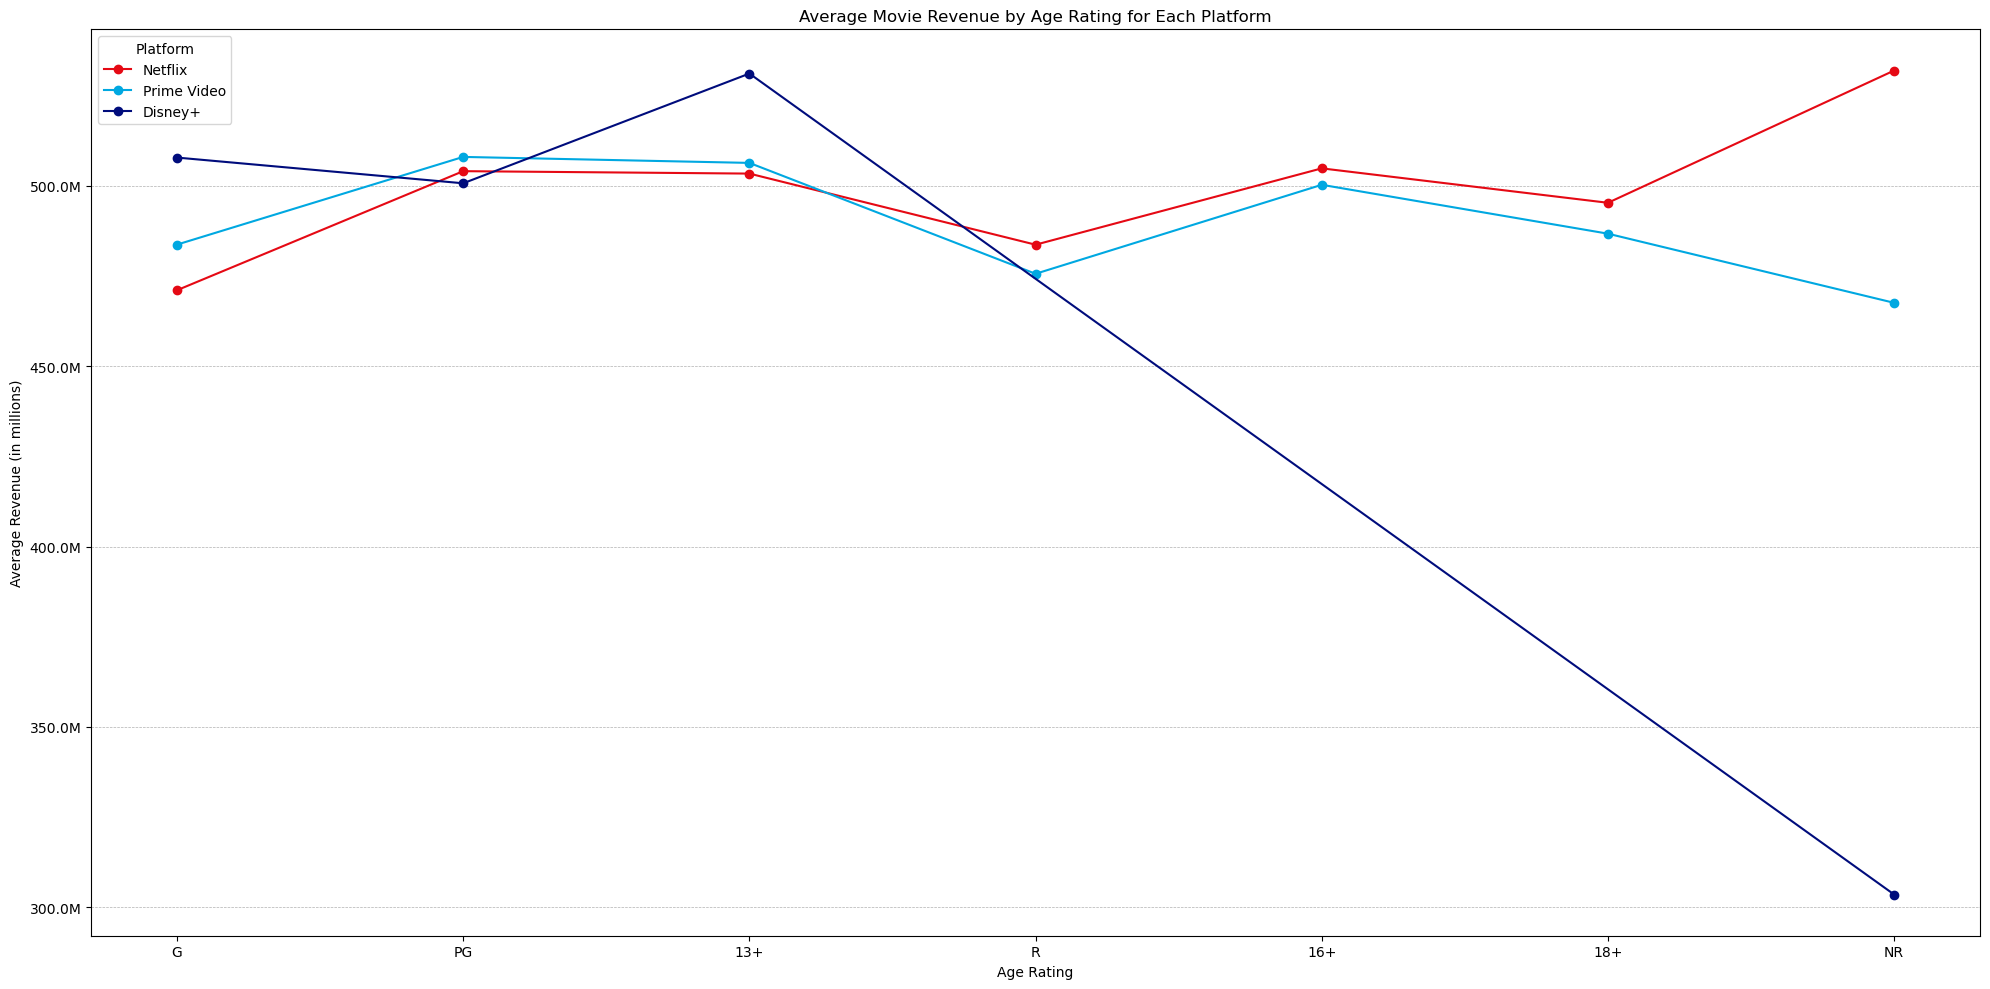

In [87]:
# Define the desired order for the age ratings
age_rating_order = ['G', 'PG', '13+', 'R', '16+', '18+', 'NR']

# Define the colors for each platform
platform_colors = {'Netflix': '#E50914', 'Prime Video': '#00A8E1', 'Disney+': '#000c7c'}

# Function to calculate average revenue per age rating
def process_df_for_age_rating_revenue(df):
    age_rating_revenue = df.groupby('age_rating')['revenue'].mean().reset_index()
    return age_rating_revenue

# Process each platform's DataFrame
netflix_age_rating_revenue = process_df_for_age_rating_revenue(netflix_movies_df)
prime_video_age_rating_revenue = process_df_for_age_rating_revenue(prime_video_movies_df)
disney_plus_age_rating_revenue = process_df_for_age_rating_revenue(disney_plus_movies_df)

# Plotting
plt.figure(figsize=(20, 10))
ax = plt.gca()  # Get current axis

# Function to plot data for a single platform
def plot_age_rating_revenue(platform_data, platform_name, color):
    x_values = []
    y_values = []
    for age_rating in age_rating_order:
        if age_rating in platform_data['age_rating'].values:
            revenue = platform_data[platform_data['age_rating'] == age_rating]['revenue'].mean()
            x_values.append(age_rating)
            y_values.append(revenue / 1e6)  # Convert to millions
    plt.plot(x_values, y_values, label=platform_name, color=color, marker='o', linestyle='-')  # Draw line with dots

# Plot for each platform
plot_age_rating_revenue(netflix_age_rating_revenue, 'Netflix', platform_colors['Netflix'])
plot_age_rating_revenue(prime_video_age_rating_revenue, 'Prime Video', platform_colors['Prime Video'])
plot_age_rating_revenue(disney_plus_age_rating_revenue, 'Disney+', platform_colors['Disney+'])

plt.title('Average Movie Revenue by Age Rating for Each Platform')
plt.xlabel('Age Rating')
plt.ylabel('Average Revenue (in millions)')

# Set the x-axis to display the predefined age ratings in order
plt.xticks(age_rating_order)

# Update y-axis to display average revenue in millions
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:.1f}M'.format(x) for x in ticks_loc])

plt.legend(title='Platform')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()

# Show the plot
plt.show()


In [88]:
# Get unique age ratings from each platform
unique_netflix_age_ratings = netflix_movies_df['age_rating'].unique()
unique_prime_video_age_ratings = prime_video_movies_df['age_rating'].unique()
unique_disney_plus_age_ratings = disney_plus_movies_df['age_rating'].unique()

# Combine them and extract the unique elements across all platforms
all_unique_age_ratings = set(unique_netflix_age_ratings).union(unique_prime_video_age_ratings).union(unique_disney_plus_age_ratings)

# Convert the set to a sorted list if you want them ordered
sorted_unique_age_ratings = sorted(list(all_unique_age_ratings))

# Display the unique age ratings
print(sorted_unique_age_ratings)

['13+', '16+', '18+', 'G', 'NR', 'PG', 'R']


In [89]:
clean_combined_movies_path = '/Users/samer/Documents/github_repos/Cinemalytics/data/clean/clean_combined_movies.csv'
clean_combined_movies_df = pd.read_csv(clean_combined_movies_path)

# Assume 'rating' is the correct column name for age ratings
unique_movies_age_ratings = clean_combined_movies_df['rating'].unique()

# Remove NaN values, sort, and then add NaN back if it was in the original unique values
sorted_unique_movies_age_ratings = sorted([x for x in unique_movies_age_ratings if pd.notnull(x)])
if pd.isnull(unique_movies_age_ratings).any():
    sorted_unique_movies_age_ratings.append(np.nan)

# Display the unique age ratings
print(sorted_unique_movies_age_ratings)

['13+', '16', '16+', '18+', '66 min', '7+', '74 min', '84 min', 'AGES_16_', 'AGES_18_', 'ALL', 'ALL_AGES', 'G', 'NC-17', 'NOT_RATE', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UNRATED', 'UR', nan]


## Total Revenue per Genre for each platform (Pie Chart)

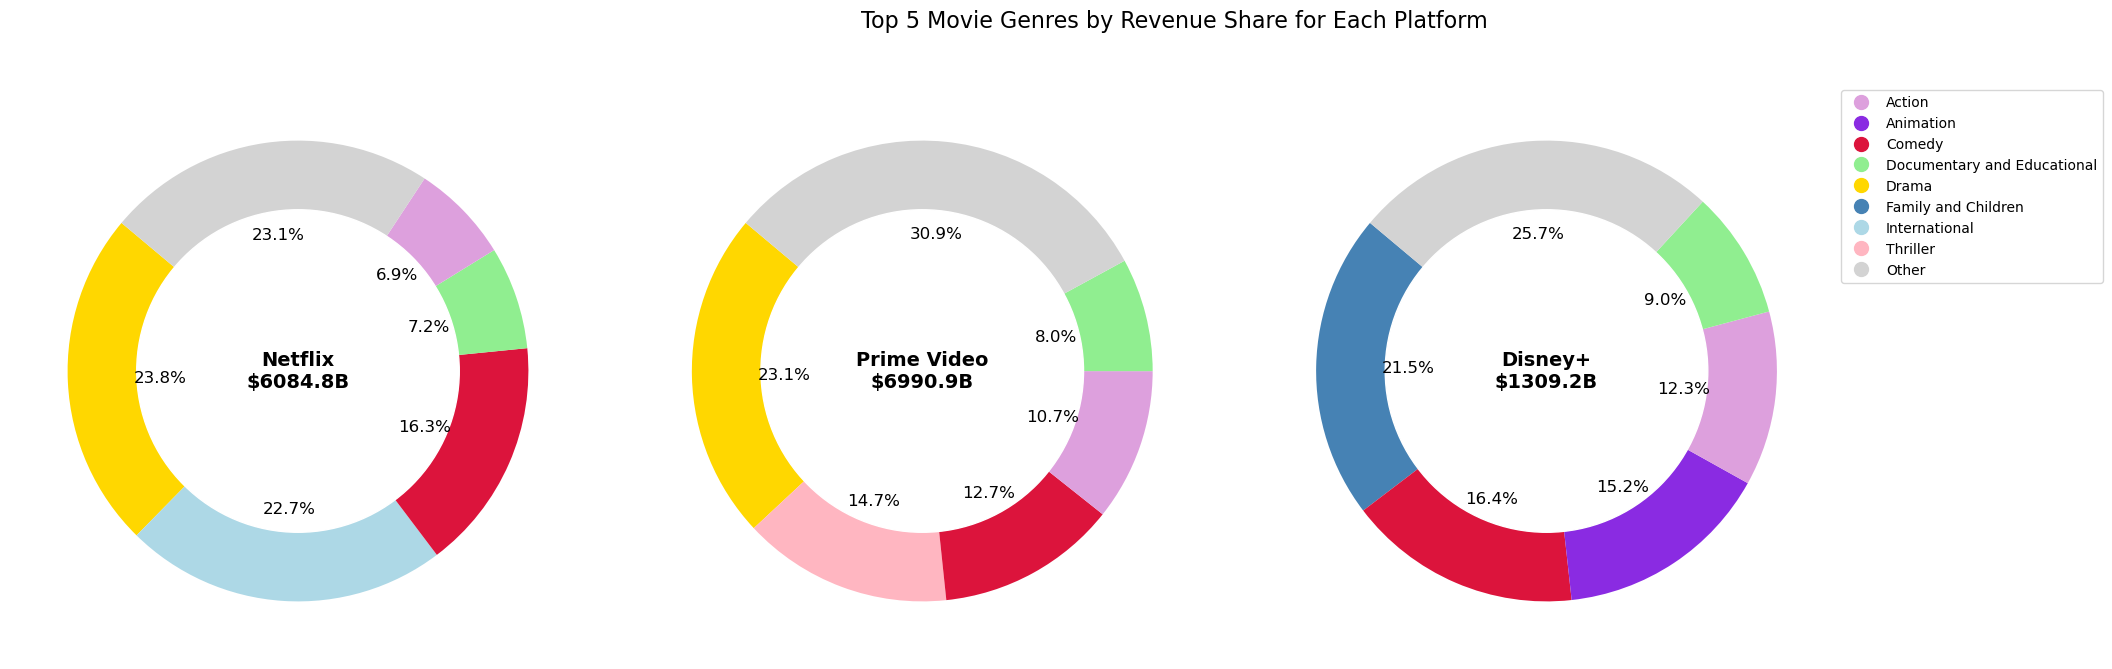

In [91]:
# Define the data preparation function
def prepare_pie_data(df, top_n=5):
    total_revenue = df.groupby('genre')['revenue'].sum().sort_values(ascending=False)
    top_genres = total_revenue.head(top_n)
    other_revenue = pd.Series(total_revenue.iloc[top_n:].sum(), index=['Other'])
    pie_data = pd.concat([top_genres, other_revenue], axis=0)
    return pie_data, total_revenue.sum()

# Prepare the data for pie charts
netflix_pie_data, netflix_total_revenue = prepare_pie_data(netflix_movies_df)
prime_video_pie_data, prime_video_total_revenue = prepare_pie_data(prime_video_movies_df)
disney_plus_pie_data, disney_plus_total_revenue = prepare_pie_data(disney_plus_movies_df)

# Generate a color palette for all unique genres across platforms
all_genres = netflix_pie_data.index.union(prime_video_pie_data.index).union(disney_plus_pie_data.index).drop('Other')
unique_colors = sns.color_palette('husl', n_colors=len(all_genres))
genre_colors = dict(zip(all_genres, unique_colors))
genre_colors['Other'] = 'lightgrey'  # Set a distinct color for 'Other'
genre_colors['Action'] = 'plum'  # Set a distinct color for 'Action
genre_colors['Comedy'] = 'crimson'  # Set a distinct color for 'Adventure'
genre_colors['Documentary and Educational'] = 'lightgreen'  # Set a distinct color for 'Adventure'
genre_colors['International'] = 'lightblue'  # Set a distinct color for 'Adventure'
genre_colors['Drama'] = 'gold'  # Set a distinct color for 'Adventure'
genre_colors['Thriller'] = 'lightpink'  # Set a distinct color for 'Adventure'
genre_colors['Animation'] = 'blueviolet'  # Set a distinct color for 'Adventure'
genre_colors['Family and Children'] = 'steelblue'  # Set a distinct color for 'Adventure'

# Updated function to create a pie chart without genre labels
def create_pie_chart(data, ax, platform, total_rev):
    ax.pie(data, colors=[genre_colors[genre] for genre in data.index],
       autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '', startangle=140,
       textprops={'fontsize': 12})  # Adjust the fontsize as needed
    # Center text
    ax.text(0, 0, f"{platform}\n${total_rev / 1e9:.1f}B", 
            ha='center', va='center', fontsize=14, fontweight='bold')
    # Donut chart
    centre_circle = plt.Circle((0,0), 0.70, color='white')
    ax.add_artist(centre_circle)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(24, 7))

# Create pie charts
create_pie_chart(netflix_pie_data/netflix_pie_data.sum(), axs[0], 'Netflix', netflix_total_revenue)
create_pie_chart(prime_video_pie_data/prime_video_pie_data.sum(), axs[1], 'Prime Video', prime_video_total_revenue)
create_pie_chart(disney_plus_pie_data/disney_plus_pie_data.sum(), axs[2], 'Disney+', disney_plus_total_revenue)

# Create the legend for genres
patch_list = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=genre_colors[genre], 
             label="{:s}".format(genre))[0] for genre in genre_colors]

# Adjust the position of the legend
# Move it to the right of the plots, vertically centered
plt.legend(handles=patch_list, loc='upper left', bbox_to_anchor=(1, 1))

# Set a central title for the entire figure
fig.suptitle('Top 5 Movie Genres by Revenue Share for Each Platform', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])  # Adjust the layout
plt.show()

## Application GUI Prototype (Outdated)

In [72]:
'''
def center_window(win):
    win.update_idletasks()
    width = win.winfo_width()
    frm_width = win.winfo_rootx() - win.winfo_x()
    win_width = width + 2 * frm_width
    height = win.winfo_height()
    titlebar_height = win.winfo_rooty() - win.winfo_y()
    win_height = height + titlebar_height + frm_width
    x = win.winfo_screenwidth() // 2 - win_width // 2
    y = win.winfo_screenheight() // 2 - win_height // 2
    win.geometry('{}x{}+{}+{}'.format(width, height, x, y))
    win.deiconify()

def display_logo():
    logo_path = '/Users/samer/Documents/github_repos/Cinemalytics/images/cinemalytics_nobackground.png'
    img = Image.open(logo_path)
    img = img.resize((100, 100), Image.Resampling.LANCZOS)
    logo_image = ImageTk.PhotoImage(img)
    logo_label = Label(app, image=logo_image)
    logo_label.image = logo_image
    logo_label.pack(pady=20)

def show_recommendation():
    clear_window()
    display_logo()
    tk.Label(app, text="Based on your criteria, we would recommend:", pady=10).pack(expand=True)
    for i in range(1, 4):
        tk.Label(app, text=f"{i}. Platform").pack()
    tk.Button(app, text="Back to Start page", command=welcome_window, padx=20, pady=10).pack(side=tk.LEFT, padx=(100, 10), pady=(10, 20))
    tk.Button(app, text="Close", command=app.destroy, padx=20, pady=10).pack(side=tk.RIGHT, padx=(10, 100), pady=(10, 20))

def input_window(content_type):
    clear_window()
    display_logo()
    tk.Label(app, text=content_type, pady=10).pack()
    tk.Label(app, text="Genre").pack()
    global genre_entry
    genre_entry = tk.Entry(app)
    genre_entry.pack()
    length_label_text = "Movie length (minutes)" if content_type == "Movies" else "Seasons"
    tk.Label(app, text=length_label_text).pack()
    global length_entry
    length_entry = tk.Entry(app)
    length_entry.pack()
    tk.Label(app, text="Rating (e.g., PG, PG-13)").pack()
    global rating_entry
    rating_entry = tk.Entry(app)
    rating_entry.pack()
    tk.Button(app, text="Enter", command=show_recommendation).pack(pady=20)

def content_selection_window():
    clear_window()
    display_logo()
    tk.Button(app, text="Movie?", command=lambda: input_window("Movies"), padx=20, pady=10).pack(pady=10)
    tk.Button(app, text="TV Show?", command=lambda: input_window("TV Shows"), padx=20, pady=10).pack(pady=10)

def welcome_window():
    clear_window()
    display_logo()
    tk.Label(app, text="Welcome to Cinemalytics!", pady=10).pack()
    tk.Button(app, text="Start", command=content_selection_window, padx=20, pady=10).pack()
    tk.Label(app, text="© 2024 Cinemalytics, Inc.", pady=10).pack(side=tk.BOTTOM)

def clear_window():
    for widget in app.winfo_children():
        widget.destroy()

def on_close():
    if messagebox.askokcancel("Quit", "Do you want to quit?"):
        app.destroy()

app = tk.Tk()
app.title("Cinemalytics - Platform Recommender")
app.geometry('400x400')
center_window(app)

app.protocol("WM_DELETE_WINDOW", on_close)  # Handle the window close event

welcome_window()
app.mainloop()
'''

## Train Model (Uzair's Code)

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from joblib import dump


# Load the dataset
df = pd.read_csv(r'/Users/samer/Documents/github_repos/Cinemalytics/data/clean/updated_clean_combined_movies.csv')

# Encode 'genre' and 'age_rating' using LabelEncoder
label_encoder_genre = LabelEncoder()
df['genre_encoded'] = label_encoder_genre.fit_transform(df['genre'])

label_encoder_age_rating = LabelEncoder()
df['age_rating_encoded'] = label_encoder_age_rating.fit_transform(df['age_rating'])

label_encoder_platform = LabelEncoder()
df['platform_encoded'] = label_encoder_platform.fit_transform(df['platform'])

# Select features and target variable for the model
X = df[['genre_encoded', 'duration_min', 'age_rating_encoded']]
y = df['platform_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Save the trained model
dump(clf, r'/Users/samer/Documents/model_cinemalytics/random_forest_model.joblib')

# Save the label encoders
dump(label_encoder_genre, r'/Users/samer/Documents/model_cinemalytics/genre_encoder.joblib')
dump(label_encoder_age_rating, r'/Users/samer/Documents/model_cinemalytics/age_rating_encoder.joblib')
dump(label_encoder_platform, r'/Users/samer/Documents/model_cinemalytics/platform_encoder.joblib')

# Predict on the test set and evaluate the model's accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Gather user input
genre_input = input("Enter the movie's genre: ")
duration_input = int(input("Enter the movie's duration in minutes: "))
age_rating_input = input("Enter the movie's age rating: ")

# Transform inputs using the fitted LabelEncoders
try:
    genre_encoded = label_encoder_genre.transform([genre_input])[0]
    age_rating_encoded = label_encoder_age_rating.transform([age_rating_input])[0]
except ValueError as e:
    print(f"Error: {e}. Please ensure your inputs match the dataset's categories.")
    exit()

# Create DataFrame for the new movie
new_movie = pd.DataFrame({'genre_encoded': [genre_encoded], 'duration_min': [duration_input], 'age_rating_encoded': [age_rating_encoded]})

# Use the trained classifier to predict the best platform
predicted_platform_encoded = clf.predict(new_movie)
predicted_platform = label_encoder_platform.inverse_transform(predicted_platform_encoded)

print(f'Accuracy on the test set: {accuracy:.4f}')
print(f'Best Platform for the new movie: {predicted_platform[0]}')


Accuracy on the test set: 0.7493
Best Platform for the new movie: Prime Video


## Implementing Model into GUI (Uzair's Code modified)

In [7]:
# Attempt to improve GUI buttons being clunky

import threading

def predict_platform_async(clf, genre_input, duration_input, age_rating_input, label_encoders, result_label):
    def task():
        try:
            duration_input = int(duration_input)
            genre_encoded = label_encoder_genre.transform([genre_input])[0]
            age_rating_encoded = label_encoder_age_rating.transform([age_rating_input])[0]
            input_features = pd.DataFrame({
                'genre_encoded': [genre_encoded],
                'duration_min': [duration_input],
                'age_rating_encoded': [age_rating_encoded]
            })
            predicted_platform_encoded = clf.predict(input_features)
            predicted_platform = label_encoder_platform.inverse_transform(predicted_platform_encoded)
            # Update the result label in the main thread
            result_label.config(text=f"Best Platform for the new movie: {predicted_platform[0]}")
        except ValueError as e:
            result_label.config(text=f"Error: {e}. Please ensure your inputs match the dataset's categories.")
        except Exception as e:
            result_label.config(text=f"An error occurred: {e}")

    # Run the task in a background thread
    threading.Thread(target=task).start()

In [3]:
def load_data():
    dataset_path = '/Users/samer/Documents/github_repos/Cinemalytics/data/clean/updated_clean_combined_movies.csv'
    return pd.read_csv(dataset_path)

def process_data(df):
    df['genre'] = df['genre'].astype(str).str.split(',')
    exploded_genres = df.explode('genre')
    exploded_genres['genre'] = exploded_genres['genre'].str.strip()
    unique_genres = sorted(exploded_genres['genre'][exploded_genres['genre'] != 'nan'].unique())
    unique_age_ratings = sorted(df['age_rating'].dropna().unique())
    return unique_genres, unique_age_ratings

def load_image(root):
    global logo_image
    logo_path = '/Users/samer/Documents/github_repos/Cinemalytics/images/cinemalytics_nobackground.png'
    # Open the original image
    original_logo = Image.open(logo_path)
    # Resize the image using Image.Resampling.LANCZOS
    resized_logo = original_logo.resize((100, 100), Image.Resampling.LANCZOS)
    # Convert the resized image to a PhotoImage
    logo_image = ImageTk.PhotoImage(resized_logo, master=root)

def setup_gui(unique_genres, unique_age_ratings, clf, label_encoders):
    root = tk.Tk()
    root.title("Cinemalytics")

    load_image(root)  # Load the logo image after the root window is created

    logo_label = tk.Label(root, image=logo_image)
    logo_label.grid(row=0, column=0, columnspan=2, pady=10)

    create_widgets(root, unique_genres, unique_age_ratings, clf, label_encoders)

    root.mainloop()

def create_widgets(root, unique_genres, unique_age_ratings, clf, label_encoders):
    genre_var, duration_entry, age_rating_var, result_label = create_input_widgets(root, unique_genres, unique_age_ratings)
    setup_predict_button(root, clf, genre_var, duration_entry, age_rating_var, label_encoders, result_label)

def create_input_widgets(root, unique_genres, unique_age_ratings):
    tk.Label(root, text="Genre:").grid(row=1, column=0, padx=10, pady=10)
    genre_var = tk.StringVar()
    ttk.Combobox(root, textvariable=genre_var, values=unique_genres).grid(row=1, column=1, padx=10, pady=10)

    tk.Label(root, text="Duration (min):").grid(row=2, column=0, padx=10, pady=10)
    duration_entry = tk.Entry(root)
    duration_entry.grid(row=2, column=1, padx=10, pady=10)

    tk.Label(root, text="Age Rating:").grid(row=3, column=0, padx=10, pady=10)
    age_rating_var = tk.StringVar()
    ttk.Combobox(root, textvariable=age_rating_var, values=unique_age_ratings).grid(row=3, column=1, padx=10, pady=10)

    result_label = tk.Label(root, text="Prediction will appear here")
    result_label.grid(row=5, column=0, columnspan=2, padx=10, pady=10)

    return genre_var, duration_entry, age_rating_var, result_label

def setup_predict_button(root, clf, genre_var, duration_entry, age_rating_var, label_encoders, result_label):
    predict_button = tk.Button(root, text="Predict Platform", command=lambda: predict_platform(clf, genre_var.get(), duration_entry.get(), age_rating_var.get(), label_encoders, result_label))
    predict_button.grid(row=4, column=0, columnspan=2, pady=10)

def predict_platform(clf, genre_input, duration_input, age_rating_input, label_encoders, result_label):
    label_encoder_genre, label_encoder_age_rating, label_encoder_platform = label_encoders
    try:
        duration_input = int(duration_input)
        genre_encoded = label_encoder_genre.transform([genre_input])[0]
        age_rating_encoded = label_encoder_age_rating.transform([age_rating_input])[0]
        input_features = pd.DataFrame({
            'genre_encoded': [genre_encoded],
            'duration_min': [duration_input],
            'age_rating_encoded': [age_rating_encoded]
        })
        predicted_platform_encoded = clf.predict(input_features)
        predicted_platform = label_encoder_platform.inverse_transform(predicted_platform_encoded)
        result_label.config(text=f"Best Platform for the new movie: {predicted_platform[0]}")
    except ValueError as e:
        result_label.config(text=f"Error: {e}. Please ensure your inputs match the dataset's categories.")
    except Exception as e:
        result_label.config(text=f"An error occurred: {e}")

if __name__ == "__main__":
    df = load_data()
    unique_genres, unique_age_ratings = process_data(df)
    clf = load(r'/Users/samer/Documents/model_cinemalytics/random_forest_model.joblib')
    label_encoder_genre = load(r'/Users/samer/Documents/model_cinemalytics/genre_encoder.joblib')
    label_encoder_age_rating = load(r'/Users/samer/Documents/model_cinemalytics/age_rating_encoder.joblib')
    label_encoder_platform = load(r'/Users/samer/Documents/model_cinemalytics/platform_encoder.joblib')
    label_encoders = (label_encoder_genre, label_encoder_age_rating, label_encoder_platform)
    
    # Now setup_gui is responsible for initializing the Tkinter root and loading the image
    setup_gui(unique_genres, unique_age_ratings, clf, label_encoders)
